# Homework 4: K means and PCA

## Setup

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Data Preprocessing

In this Colab, rather than downloading a file from Google Drive, we will load a famous machine learning dataset, the [Breast Cancer Wisconsin dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html), using the ```scikit-learn``` datasets loader.

In [279]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [280]:
#Shape of data (X) and target (Y) values

breast_cancer = load_breast_cancer()
print(breast_cancer.target.shape)
print(breast_cancer.data.shape)
print(breast_cancer.feature_names)

(569,)
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


For convenience, given that the dataset is small, we first construct a Pandas dataframe and a Numpy array:
*   ```features```, a dataframe of Dense vectors, containing all the original features in the dataset;
*   ```labels```, a series of binary labels indicating if the corresponding set of features belongs to a subject with breast cancer, or not.



In [281]:
features = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
features.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [282]:
name = ['label']
labels = breast_cancer.target
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

# Task 1: K-means (25 points)

If you run successfully the Setup and Data Preprocessing stages, you are now ready to cluster the data with the [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) algorithm included sklearn.
Set the ```k``` parameter to **2**, fit the model, and the compute the [Silhouette score](https://en.wikipedia.org/wiki/Silhouette_(clustering)) (i.e., a measure of quality of the obtained clustering).  

**IMPORTANT:** use sklearn implementation of the Silhouette score (via ```sklearn.metrics```).

In [283]:
from sklearn.cluster import KMeans
X = features
kmeans = KMeans(n_clusters=2).fit(X)


Take the predictions produced by K-means, and compare them with the ```labels``` variable (i.e., the ground truth from our dataset).  

For each cluster, compute how many data points in the dataset have been positive cases and negative cases. Based on this, use your judgement to determine which cluster should be assigned which label, and how many points have been labeled correctly.

**IMPORTANT**: K-means is a clustering algorithm, so it will not output a label for each data point, but just a cluster identifier!  As such, label ```0``` does not necessarily match the cluster identifier ```0```.


In [284]:
klabel = kmeans.fit_predict(X)
klabel

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [286]:
kmeans.cluster_centers_

array([[1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
        2.83553653e-01, 8.32819406e-02],
       [1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01,

## Silhouette score KMeans

In [287]:
scoreK = silhouette_score(X, kmeans.labels_, metric='euclidean')
scoreK

0.6972646156059464

In [288]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(labels, klabel)

array([[ 82, 130],
       [356,   1]])

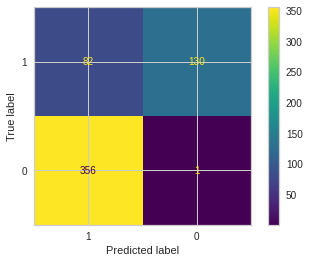

In [289]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels, klabel)
cmd = ConfusionMatrixDisplay(cm, display_labels=['1','0'])
cmd.plot()

## ANSWER: In the case of k-means, the euclidean distance between each observation (data point) and each cluster mean (centroid) is computed, and the observations are assigned to the cluster with the most comparable observations.

In [290]:
list_of_arrays = [labels,klabel]
comparison_df = pd.DataFrame(np.array(list_of_arrays).T)

comparison_df.columns = ['clusters','pred']
comparison_df.head()

,clusters,pred
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1


In [291]:
correct = len(comparison_df[comparison_df['pred'] == comparison_df['clusters']])
total = len(comparison_df)
incorrect = total - correct
print(correct,incorrect, total, correct/total, incorrect/total)

83 486 569 0.14586994727592267 0.8541300527240774


## ANSWER: 85.4% and 14.5% for positive and negative cases

## cluster 0 can be assigned for label 1 and cluster 1 can be assigned for label 0

# Task 2: PCA (10 points)

Now perform dimensionality reduction on the ```features``` using the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) statistical procedure, available in sklearn.

Set the ```n``` parameter to **2**, effectively reducing the dataset size of a **15X** factor: from 30 features to just 2.

In [292]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = features

#X_normalized = StandardScaler().fit(X).transform(X)  

pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
print(X.shape, X_pca.shape) # to check the dimensions of feature matrix

(569, 30) (569, 2)


In [293]:
X_pca

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

Now run K-means with the same parameters as above, but on the ```pcaFeatures``` produced by the PCA reduction you just executed and compute the Silhouette score.

In [294]:
from sklearn.cluster import KMeans
X = X_pca
kmeans = KMeans(n_clusters=2).fit(X)

In [295]:
label = kmeans.fit_predict(X_pca)
label

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [296]:
kmeans.cluster_centers_

array([[-3.06510219e+02, -4.74773896e-01],
       [ 1.02482043e+03,  1.58741196e+00]])

## Silhouette score PCA

In [297]:
scorePCA = silhouette_score(X_pca, kmeans.labels_, metric='euclidean')
scorePCA

0.6984195775999954

Use the 2 features generated from your PCA to visualize the clusters. Since we have used PCA to bring down th number of features to 2, they can be visualized in a x-y scatter plot. Also plot the centroids generated from the k-means on the same plot.
Make sure to give different colors to the two clusters based on their cluster labels generated by k-means.

HINT: Read the documentation for the scatter() function.

## SCATTER PLOT OF THE 2 CLUSTERS:

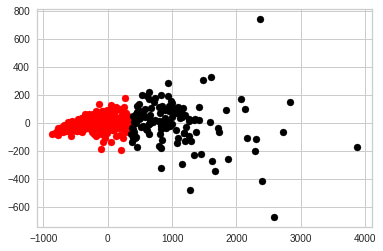

In [298]:
#filter rows of original data
label0 = X_pca[label == 0]

label1 = X_pca[label == 1]
 
#Plotting the results
plt.scatter(label0[:,0] , label0[:,1] , color = 'red')
plt.scatter(label1[:,0] , label1[:,1] , color = 'black')
plt.show()

# Task 3: SVD (10 points)

Perform all the tasks you did in Task 2, just instead of PCA, use sklearn to perform [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html), again with n = 2

In [299]:
from sklearn.decomposition import TruncatedSVD 
SVD=TruncatedSVD(2)
X = features
X_svd = SVD.fit_transform(X)
X_svd

array([[2241.97427647,  347.71556015],
       [2372.40840267,   56.90166991],
       [2101.8402797 ,   11.94762737],
       ...,
       [1424.53280954,  -55.0217124 ],
       [2231.65579282,   19.99439854],
       [ 331.69302638,   -5.29733966]])

In [300]:
X = X_svd
kmeans = KMeans(n_clusters=2).fit(X)

In [301]:
label = kmeans.fit_predict(X_svd)
label

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [302]:
kmeans.cluster_centers_

array([[ 801.97683158,  -56.56898467],
       [2128.28386498,   49.79178396]])

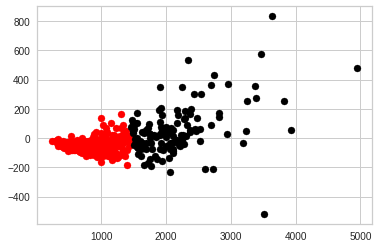

In [303]:
import matplotlib.pyplot as plt
 
#filter rows of original data
label0 = X_svd[label == 0]

label1 = X_svd[label == 1]
 
#Plotting the results
plt.scatter(label0[:,0] , label0[:,1] , color = 'red')
plt.scatter(label1[:,0] , label1[:,1] , color = 'black')
plt.show()

## Silhouette score SVD

In [304]:
scoreSVD = silhouette_score(X_svd, kmeans.labels_, metric='euclidean')
scoreSVD

0.6988822510646757

If you have done all the 3 tasks correctly, you should notice that the silhouette score for all 3 methods is almost the same. This is because we have restricted the number of clusters to two. And while there are binary labels, this dataset has 30 features, and breast cancer cases depend on a variable range of data, and hence splitting them into more clusters helps us learn more about the similarities in each cluster. 

Your last take focuses on that!

## ANSWER: Silhoutte score for above 3 cases is approximately same = 0.69

# Task 4: Comparative Analysis to Determine Best value of K (25 points)

For this entire section, use the original data before running any dimensionality reduction algorithms (features, labels).

Run k-means for ```k=2,3,4,5```, calculate the silhouette score and plot the data with the help of ```SilhouetteVisualizer``` from [yellowbricks](https://www.scikit-yb.org/en/latest/index.html). Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it’s using Matplotlib.

**HINT:** Read up about how the Silhouette plot should look, SilhouetteVisualizer is a very particular plot, which makes understanding the score and clusters intuitive.

The y-axis denotes the number of examples, and x-axis denotes the silhouette score for the various clusters with a line depiciting the average silhouette scores.

Silhouette plot for k = 2


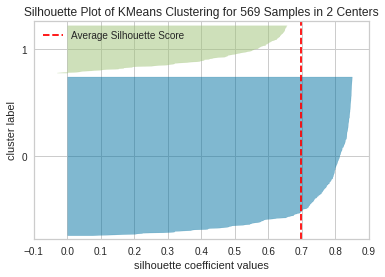

Silhouette Score: 0.697
Silhouette plot for k = 3


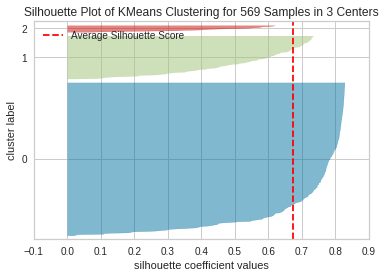

Silhouette Score: 0.675
Silhouette plot for k = 4


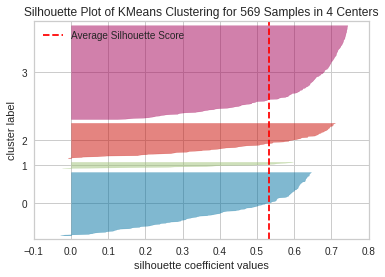

Silhouette Score: 0.533
Silhouette plot for k = 5


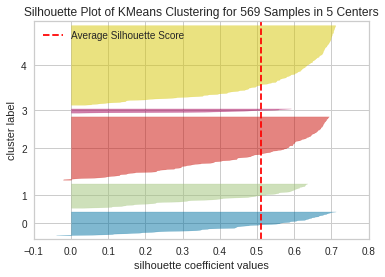

Silhouette Score: 0.510


In [305]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Loading the dataset
breast_cancer = load_breast_cancer()
features = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

X = features
for i in range(2,6): # k = 2,3,4,5
  # Instantiate the clustering model and visualizer
  model = KMeans(i, random_state=42)
  sp = SilhouetteVisualizer(model, colors='yellowbrick')
  print("Silhouette plot for k =", i)
  sp.fit(X)        # Fit the data to the visualizer
  sp.show() 
  score = silhouette_score(X, model.labels_, metric='euclidean')
  print('Silhouette Score: %.3f' % score)

Based on your 4 plots, write how many number of clusters is optimal and why?

Make sure your answer is based on reasoning covering the following points:


*   Average silhouette score
*   Thickness of silhouette plots for various clusters
*   Fluctuations in size of the silhouette plots




## ANSWER:
## k = 4 & 5 seems to be optimal as it has clusters present above the average silhoutte score.
## Size fluctuations of silhoutte plots seem similar in both cases for k = 4 & 5.

# Task 5: CUR Decomposition (30 points)

**Implement** CUR Decomposition for the ```features``` matrix. 


*   For matrix C and R use the Column Select Algorithm to choose the columns and rows for C and R respectively. 
*   For matrix U, find the intersection between the matrices C and R, and then find its pseudo-inverse using ```numpy.linalg.pinv```

Choose the rank to be 2. Hence the order of your matrices should be:


*   C: (569 X 2)
*   U: (2 X 2)
*   R: (2 X 30)





In [306]:
from numpy.linalg import pinv as inv
from scipy import sparse as sp

def col_select(matrix, rank, dup=False):
    # prob 1d array of probabilities of all columns
    prob = matrix.T.dot(matrix)
    prob = np.array(np.diagonal(prob))
    denom = np.abs(prob).sum(axis = 0)
    prob = prob/denom

    C = np.zeros((matrix.shape[0], rank))
    ind_cols = np.arange(0, prob.size)
    c_ind = []
    for i in range(rank):
        rand_sel = np.random.choice(ind_cols, 1, p=prob)
        c_ind.append(rand_sel[0])
        C[:, i] = matrix.iloc[:, rand_sel[0]]
        C[:, i] = C[:, i]/np.sqrt(rank*prob[rand_sel[0]])

    return C, c_ind

def rows_select(matrix, rank, dup=False):

    prob = matrix.dot(matrix.T)
    prob = np.array(np.diagonal(prob))
    denom = np.abs(prob).sum(axis=0)
    prob = prob/denom
    print(prob)
    R = np.zeros((rank, matrix.shape[1]))
    ind_rows = np.arange(0, prob.size)
    r_ind = []
    for i in range(rank):
        rand_sel = np.random.choice(ind_rows, 1, p=prob)
        r_ind.append(rand_sel[0])
        R[i, :] = matrix.iloc[rand_sel[0], :]
        R[i, :] = R[i, :]/np.sqrt(rank*prob[rand_sel[0]])
    r_ind = np.array(r_ind)
    return R, r_ind

def intersection(matrix, c_ind, r_ind):
    
    W = np.zeros((len(r_ind), len(c_ind)))
    for i in range(len(r_ind)):
        W[i] = matrix.iloc[r_ind[i], c_ind]
    
    return W

def pseudoInverse(W):

    X, Z, YT = np.linalg.svd(W)
    
    XT = X.T
    Y = YT.T

    ZP = np.reciprocal(Z)
    ZP = sp.spdiags(ZP, 0, ZP.size, ZP.size)
    ZP = ZP@ZP

    WP = Y@ZP
    WP = WP@XT

    return WP


In [307]:
matrix= features
C, c_ind = col_select(matrix, 2)
R, r_ind= rows_select(matrix, 2)
W = intersection(matrix, c_ind, r_ind)
U = pseudoInverse(W)

[5.39490027e-03 5.89957572e-03 4.62684468e-03 5.12400227e-04
 4.41287779e-03 8.34552251e-04 3.87778016e-03 1.21799020e-03
 8.77548834e-04 7.87749907e-04 2.08238320e-03 2.44108504e-03
 3.23730760e-03 1.47360071e-03 8.83853125e-04 1.41573476e-03
 1.87609301e-03 2.51581426e-03 7.75341796e-03 8.85422176e-04
 7.18023322e-04 1.91517354e-04 1.55764605e-03 9.29310523e-03
 6.05290544e-03 3.16019528e-03 1.30588046e-03 3.36149943e-03
 2.28683401e-03 2.56969923e-03 4.21719053e-03 1.05490208e-03
 2.77808864e-03 4.90738491e-03 2.38068161e-03 2.40868117e-03
 1.11488935e-03 6.15395021e-04 1.05534300e-03 9.23602590e-04
 1.00299395e-03 4.36587705e-04 4.19476955e-03 1.19712128e-03
 8.91636028e-04 3.83011066e-03 1.11363734e-04 9.24108442e-04
 5.83034234e-04 8.61436191e-04 4.86450042e-04 8.12996429e-04
 5.06325803e-04 2.99070771e-03 1.67028867e-03 4.57874561e-04
 6.26712041e-03 1.49602260e-03 7.16957284e-04 1.39385539e-04
 2.55643847e-04 1.38986119e-04 1.43094689e-03 1.81504408e-04
 1.11080552e-03 1.391010

In [308]:
print(C.shape, U.shape, R.shape)

(569, 2) (2, 2) (2, 30)


## ANSWER: From above output, C: (569 X 2) U: (2 X 2) R: (2 X 30) as required